In [1]:
from tqec.sketchup import ZXGraph, Position3D, NodeType

In [2]:
zx_graph = ZXGraph("logical_cnot")
for position, node_type in [
    (Position3D(0, 0, 0), NodeType.V),
    (Position3D(0, 0, 1), NodeType.X),
    (Position3D(0, 0, 2), NodeType.Z),
    (Position3D(0, 0, 3), NodeType.V),
    (Position3D(0, 1, 1), NodeType.X),
    (Position3D(0, 1, 2), NodeType.Z),
    (Position3D(1, 1, 0), NodeType.V),
    (Position3D(1, 1, 1), NodeType.Z),
    (Position3D(1, 1, 2), NodeType.Z),
    (Position3D(1, 1, 3), NodeType.V),
]:
    zx_graph.add_node(position, node_type)
    
for u, v in [
   (Position3D(0, 0, 0), Position3D(0, 0, 1)),
   (Position3D(0, 0, 1), Position3D(0, 0, 2)),
   (Position3D(0, 0, 2), Position3D(0, 0, 3)),
   (Position3D(0, 0, 1), Position3D(0, 1, 1)),
   (Position3D(0, 1, 1), Position3D(0, 1, 2)),
   (Position3D(0, 1, 2), Position3D(1, 1, 2)),
   (Position3D(1, 1, 0), Position3D(1, 1, 1)),
   (Position3D(1, 1, 1), Position3D(1, 1, 2)),
   (Position3D(1, 1, 2), Position3D(1, 1, 3)),
   
]:
    zx_graph.add_edge(u, v)

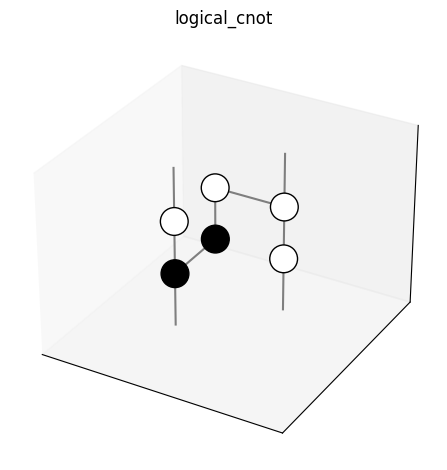

In [3]:
zx_graph.draw()

In [4]:
block_graph = zx_graph.to_block_graph(name="logical_cnot")
block_graph.cubes

[Cube(position=Position3D(x=0, y=0, z=0), cube_type=<CubeType.VIRTUAL: 'virtual'>),
 Cube(position=Position3D(x=0, y=0, z=1), cube_type=<CubeType.ZXX: 'zxx'>),
 Cube(position=Position3D(x=0, y=0, z=2), cube_type=<CubeType.ZXZ: 'zxz'>),
 Cube(position=Position3D(x=0, y=0, z=3), cube_type=<CubeType.VIRTUAL: 'virtual'>),
 Cube(position=Position3D(x=0, y=1, z=1), cube_type=<CubeType.ZXX: 'zxx'>),
 Cube(position=Position3D(x=0, y=1, z=2), cube_type=<CubeType.ZXZ: 'zxz'>),
 Cube(position=Position3D(x=1, y=1, z=0), cube_type=<CubeType.VIRTUAL: 'virtual'>),
 Cube(position=Position3D(x=1, y=1, z=1), cube_type=<CubeType.ZXZ: 'zxz'>),
 Cube(position=Position3D(x=1, y=1, z=2), cube_type=<CubeType.ZXZ: 'zxz'>),
 Cube(position=Position3D(x=1, y=1, z=3), cube_type=<CubeType.VIRTUAL: 'virtual'>)]

In [5]:
block_graph.pipes

[Pipe(u=Cube(position=Position3D(x=0, y=0, z=0), cube_type=<CubeType.VIRTUAL: 'virtual'>), v=Cube(position=Position3D(x=0, y=0, z=1), cube_type=<CubeType.ZXX: 'zxx'>), pipe_type=<PipeType.ZXO: 'zxo'>),
 Pipe(u=Cube(position=Position3D(x=0, y=0, z=2), cube_type=<CubeType.ZXZ: 'zxz'>), v=Cube(position=Position3D(x=0, y=0, z=3), cube_type=<CubeType.VIRTUAL: 'virtual'>), pipe_type=<PipeType.ZXO: 'zxo'>),
 Pipe(u=Cube(position=Position3D(x=1, y=1, z=0), cube_type=<CubeType.VIRTUAL: 'virtual'>), v=Cube(position=Position3D(x=1, y=1, z=1), cube_type=<CubeType.ZXZ: 'zxz'>), pipe_type=<PipeType.ZXO: 'zxo'>),
 Pipe(u=Cube(position=Position3D(x=1, y=1, z=2), cube_type=<CubeType.ZXZ: 'zxz'>), v=Cube(position=Position3D(x=1, y=1, z=3), cube_type=<CubeType.VIRTUAL: 'virtual'>), pipe_type=<PipeType.ZXO: 'zxo'>),
 Pipe(u=Cube(position=Position3D(x=0, y=1, z=1), cube_type=<CubeType.ZXX: 'zxx'>), v=Cube(position=Position3D(x=0, y=1, z=2), cube_type=<CubeType.ZXZ: 'zxz'>), pipe_type=<PipeType.ZXO: 'zxo'>)

In [6]:
from tqec.sketchup.collada import write_block_graph_to_dae_file

write_block_graph_to_dae_file(block_graph, "logical_cnot.dae")